[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/julprat/Armed_Bandits)

In [1]:
class MultiArmedBandit():

    """ Select an action for this state given from a list given a Q-function """

    def select(self, state, actions, qfunction):
        abstract

    """ Reset a multi-armed bandit to its initial configuration """

    def reset(self):
        self.__init__()

In [2]:
from collections import defaultdict
import random
from qtable import QTable


""" Run a bandit algorithm for a number of episodes, with each episode
being a set length.
"""

def run_bandit(bandit, episodes=200, episode_length=500, drift=True):

    # The actions available
    actions = [0, 1, 2, 3, 4]

    # A dummy state
    state = 1

    rewards = []
    for _ in range(0, episodes):
        bandit.reset()

        # The probability of receiving a payoff of 1 for each action
        probabilities = [0.1, 0.3, 0.7, 0.2, 0.1]

        # The number of times each arm has been selected
        times_selected = defaultdict(lambda: 0)
        qtable = QTable()

        episode_rewards = []
        for step in range(0, episode_length):

            # Halfway through the episode, change the probabilities
            if drift and step == episode_length / 2:
                probabilities = [0.5, 0.2, 0.0, 0.3, 0.3]

            # Select an action using the bandit
            action = bandit.select(state, actions, qtable)

            # Get the reward for that action
            reward = 0
            if random.random() < probabilities[action]:
                reward = 5

            episode_rewards += [reward]

            times_selected[action] = times_selected[action] + 1
            qtable.update(
                state,
                action,
                (reward / times_selected[action])
                - (qtable.get_q_value(state, action) / times_selected[action]),
            )

        rewards += [episode_rewards]

    return rewards

In [3]:
import random

class EpsilonGreedy(MultiArmedBandit):
    def __init__(self, epsilon=0.1):
        self.epsilon = epsilon

    def reset(self):
        pass

    def select(self, state, actions, qfunction):
        # Select a random action with epsilon probability
        if random.random() < self.epsilon:
            return random.choice(actions)
        arg_max_q = qfunction.get_argmax_q(state, actions)
        return arg_max_q

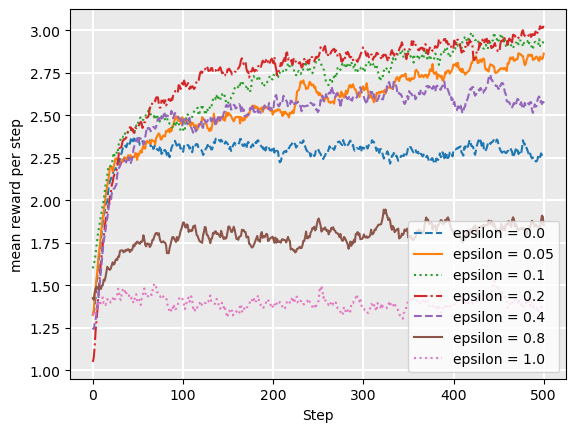

In [4]:
from multi_armed_bandit.epsilon_greedy import EpsilonGreedy
from tests.multi_armed_bandit_tests.run_bandit import run_bandit
from tests.plot import Plot


def plot_epsilon_greedy(drift=False):
    epsilon000 = run_bandit(EpsilonGreedy(epsilon=0.00), drift=drift)
    epsilon005 = run_bandit(EpsilonGreedy(epsilon=0.05), drift=drift)
    epsilon01 = run_bandit(EpsilonGreedy(epsilon=0.1), drift=drift)
    epsilon02 = run_bandit(EpsilonGreedy(epsilon=0.2), drift=drift)
    epsilon04 = run_bandit(EpsilonGreedy(epsilon=0.4), drift=drift)
    epsilon08 = run_bandit(EpsilonGreedy(epsilon=0.8), drift=drift)
    epsilon10 = run_bandit(EpsilonGreedy(epsilon=1.0), drift=drift)

    Plot.plot_rewards(
        [
            "epsilon = 0.0",
            "epsilon = 0.05",
            "epsilon = 0.1",
            "epsilon = 0.2",
            "epsilon = 0.4",
            "epsilon = 0.8",
            "epsilon = 1.0",
        ],
        [epsilon000, epsilon005, epsilon01, epsilon02, epsilon04, epsilon08, epsilon10],
    )


plot_epsilon_greedy()